<a href="https://www.kaggle.com/code/evansajumathew/instacart-market-basket-analysis?scriptVersionId=221819839" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🥕 Instacart Market Basket Analysis Report  
### Understanding Customer Purchasing Behavior with Data Insights  
This notebook explores Instacart's transactional data to identify shopping patterns, frequent item combinations, and product recommendations. 


## Table of Contents  
1. 📌 **Introduction**  
2. 🛒 **Data Exploration & Cleaning**  
3. 📈 **Statistic Analysis**
4. 📊 **Visualizations & Insights** 
5. 🔍 **Market Basket Analysis & Association Rules**   
6. ✅ **Conclusion & Key Findings**  

## 1. 📌 Introduction

In this section, we will introduce the dataset and the objectives of the analysis. We will also outline the steps we will take to explore and analyze the data.

### Objectives 🎯
- Identify customer purchasing patterns.
- Discover frequent item combinations.
- Provide product recommendations based on customer behavior.

### Dataset Overview 📂
The dataset includes information on orders, products, aisles, and departments. We will explore these datasets to gain insights into customer behavior.


## 2. 🛒 Data Exploration & Cleaning

In this section, we will load the datasets and perform initial data exploration and cleaning.

### Loading the Data 📥

In [75]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
aisles = pd.read_csv("/kaggle/input/instacart-market-basket-analysis-nonzip-dataset/aisles.csv")
departments = pd.read_csv("/kaggle/input/instacart-market-basket-analysis-nonzip-dataset/departments.csv")
odpp = pd.read_csv("/kaggle/input/instacart-market-basket-analysis-nonzip-dataset/order_products__prior.csv")
odtr = pd.read_csv("/kaggle/input/instacart-market-basket-analysis-nonzip-dataset/order_products__train.csv")
products = pd.read_csv("/kaggle/input/instacart-market-basket-analysis-nonzip-dataset/products.csv")
orders = pd.read_csv("/kaggle/input/instacart-market-basket-analysis-nonzip-dataset/orders.csv")

# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

### Initial Data Exploration 🔍

Let's take a look at the first few rows of each dataset to understand their structure.

In [40]:
# List of dataset names and corresponding DataFrames
file_names = ['aisles', 'departments', 'odpp', 'odtr', 'orders', 'products']
data = [aisles, departments, odpp, odtr, orders, products]

# Loop through and display information
for i in range(len(data)):
    print(f"Quick Summary of the Data: {file_names[i]}")
    print("-" * 50)
    print(data[i].info())
    print()
    print(f"Number of duplicate rows in {file_names[i]}: {data[i].duplicated().sum()}")
    missing_values = data[i].isnull().sum()
    total_missing = missing_values.sum()
    print(f"\nTotal missing values in {file_names[i]}: {total_missing}")
    print("-" * 50)
    print('\n')
    print("=" * 50)
    print('\n')

Quick Summary of the Data: aisles
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None

Number of duplicate rows in aisles: 0

Total missing values in aisles: 0
--------------------------------------------------




Quick Summary of the Data: departments
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None

Number of duplicate rows in departments: 0

Total 

In [41]:
# Loop through each DataFrame to display missing values
for i in range(len(data)):
    print(f"Missing Values Summary for: {file_names[i]}")
    print("-" * 50)
    
    # Check for missing values in each column
    missing_values = data[i].isna().sum()
    print(missing_values)
    
    # Optionally, show the total number of missing values
    total_missing = missing_values.sum()
    print(f"\nTotal missing values in {file_names[i]}: {total_missing}")
    print("=" * 50)

Missing Values Summary for: aisles
--------------------------------------------------
aisle_id    0
aisle       0
dtype: int64

Total missing values in aisles: 0
Missing Values Summary for: departments
--------------------------------------------------
department_id    0
department       0
dtype: int64

Total missing values in departments: 0
Missing Values Summary for: odpp
--------------------------------------------------
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Total missing values in odpp: 0
Missing Values Summary for: odtr
--------------------------------------------------
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Total missing values in odtr: 0
Missing Values Summary for: orders
--------------------------------------------------
order_id                       0
user_id                        0
eval_set                       0
order_number               

### Data Cleaning 🧹

We will check for missing values, duplicates, and perform necessary data cleaning steps.

In [42]:
# Dealing with missing values
# There are missing values in the 'days_since_prior_order' column in the 'orders' DataFrame
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0)
orders.isna().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [43]:
# Merge the DataFrames
# Merge the 'orders' and 'odpp' DataFrames
merge_orders_products = odpp.merge(products, on='product_id', how='left')
product_details = products.merge(aisles, on='aisle_id', how='left').merge(departments, on='department_id', how='left')
order_detailes = orders.merge(merge_orders_products, on='order_id', how='left')

## 3. 📈 Statistical Analysis

In this section, we will perform statistical analysis to understand the distribution of the data and identify key trends.


### Summary Statistics 📊

Let's calculate summary statistics for the numerical columns in the datasets.

In [44]:
# Statistical Summary

print(orders["days_since_prior_order"].describe().apply(lambda x: "%0.2f"%x))

count    3421083.00
mean          10.44
std            9.31
min            0.00
25%            4.00
50%            7.00
75%           15.00
max           30.00
Name: days_since_prior_order, dtype: object


<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* According to mean, Customer reorders every 11 days.
* According to median, 50% of customers reorders every 7 days
* According to 75th percentile, 75% of customers reorders every 15 days
* So only 25% customers reorders with gap greater than 15 days.

#### Observations:



In [45]:
# outlier detection
order_number_max = orders.groupby("user_id")["order_number"].max()
order_number_max_count = order_number_max.value_counts()

# Descriptive Statistics of number of orders done by users
order_number_max.describe().apply(lambda x: "%0.2f"%x)

count    206209.00
mean         16.59
std          16.65
min           4.00
25%           6.00
50%          10.00
75%          20.00
max         100.00
Name: order_number, dtype: object

<Axes: >

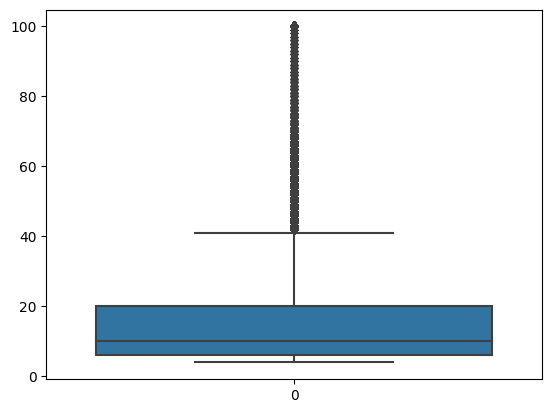

In [46]:
sns.boxplot(data=order_number_max.values)

In [47]:
# Finding the upper whisker
IQR = order_number_max.quantile(0.75) - order_number_max.quantile(0.25)
upper_whisker = order_number_max.quantile(0.75) + (1.5 * (IQR))
print(f"upper_whisker = {upper_whisker}")

upper_whisker = 41.0


<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* According to mean, Users has kept 16 orders.
* According to median, 50% of Users has kept 10 orders.
* According to 75% percentile, 75% of users has kept 20 orders.
* Maximum orders done by user bounded to 100.
* Box plot and IQR suggests that upper whisker of order_number_max = 41 and all the users who has done orders more than 41 are outliers

### Customer Rush Behavior 🏃‍♂️

We will analyze the time of day and day of the week when customers are most active.


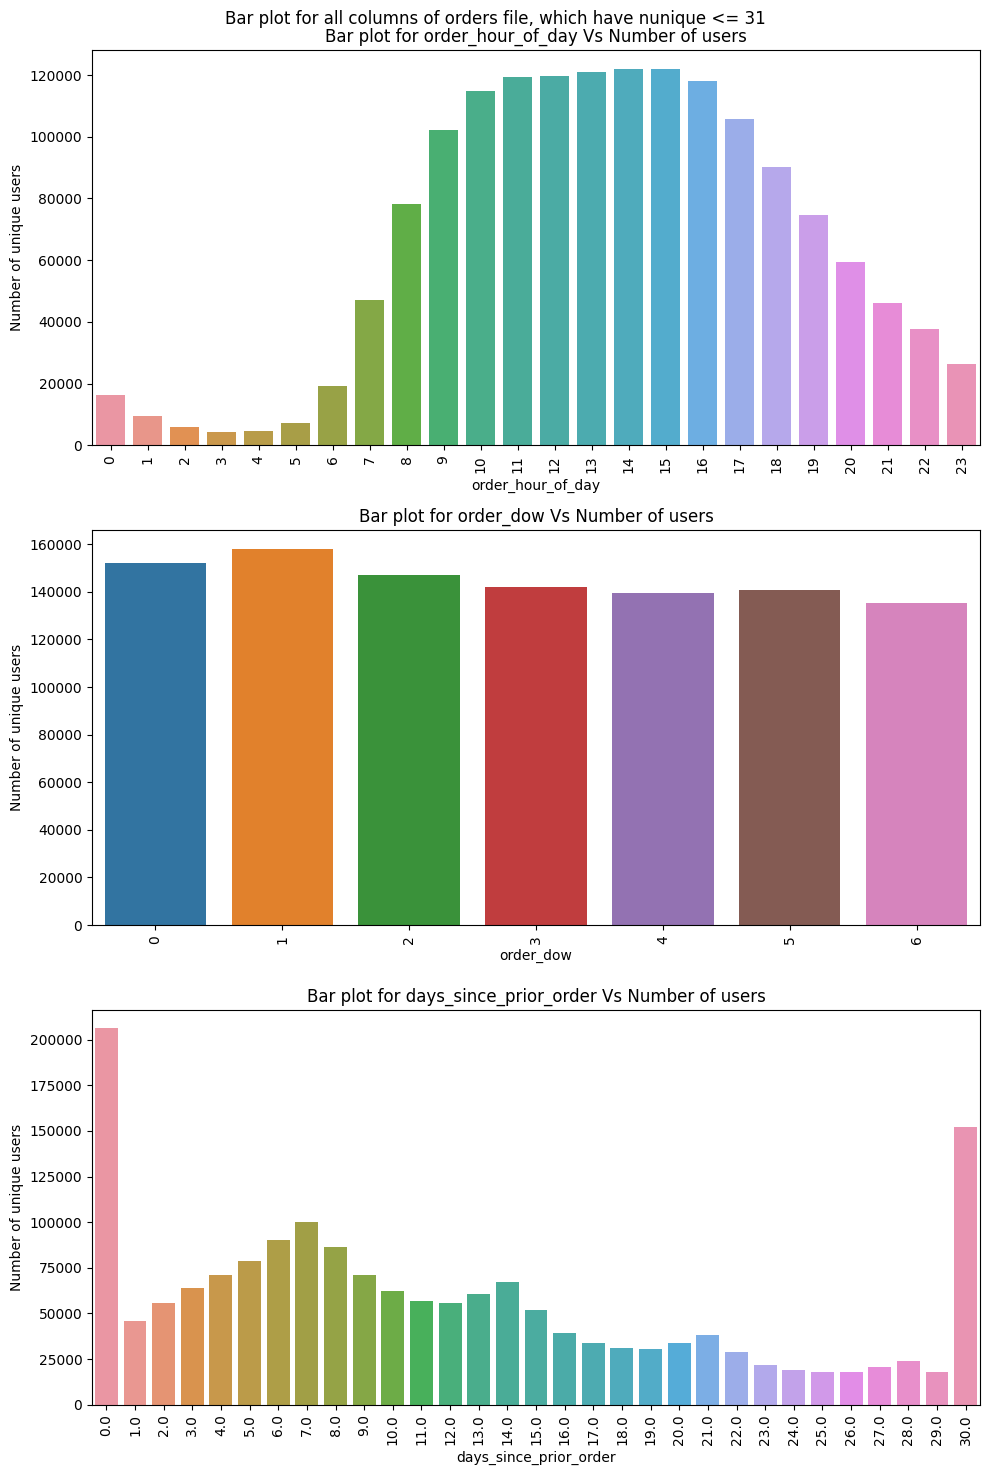

In [48]:
# Customer Rush Hours/Day of the Week
fig = plt.figure(figsize=(10, 15))
fig.suptitle("Bar plot for all columns of orders file, which have nunique <= 31")
k = 1

for i in ["order_hour_of_day", "order_dow", "days_since_prior_order"]:
    plt.subplot(3, 1, k)
    plt.title(f"Bar plot for {i} Vs Number of users")
    
    # Grouping and counting unique users
    data = orders.groupby(i)["user_id"].nunique()
    
    # Plot bar chart
    ax = sns.barplot(x=data.index, y=data.values)
    plt.ylabel("Number of unique users")
    plt.xticks(rotation=90)

    k += 1  # Move to the next subplot

plt.tight_layout()
plt.show()

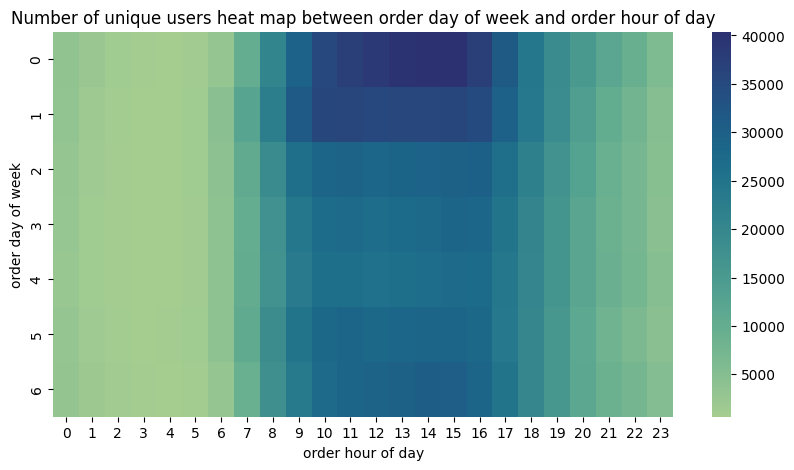

In [49]:
data = orders.groupby(["order_dow","order_hour_of_day"])["user_id"].nunique().reset_index()
data = data.pivot(index = "order_dow",columns = "order_hour_of_day",values = "user_id")
fig = plt.figure(figsize=(10,5))
sns.heatmap(data = data,cmap = "crest")
plt.title("Number of unique users heat map between order day of week and order hour of day")
plt.xlabel("order hour of day")
plt.ylabel("order day of week")
plt.show()

### Product Popularity 📈

Let's visualize the most popular products based on the number of orders.

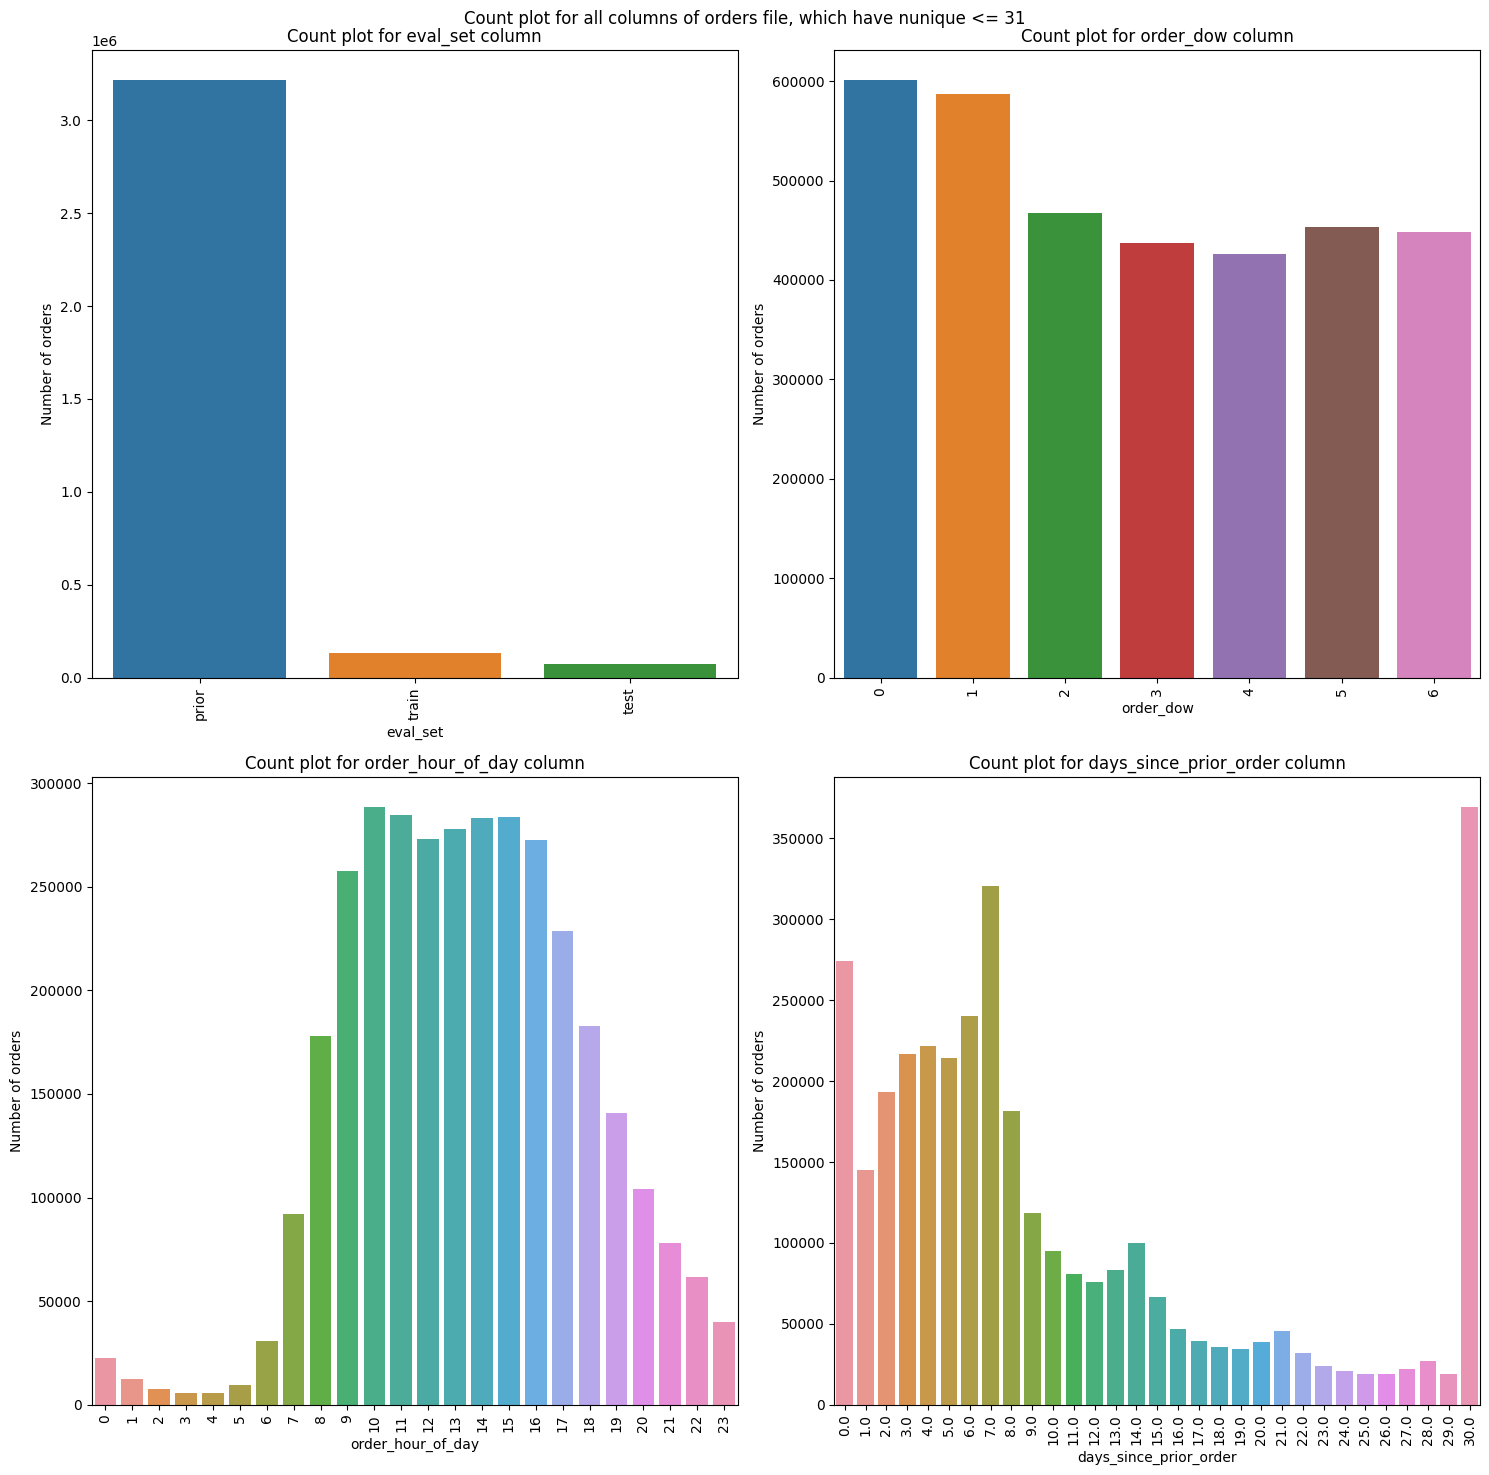

In [50]:
# Order Frequency

fig = plt.figure(figsize = (15,15))
fig.suptitle("Count plot for all columns of orders file, which have nunique <= 31")
k = 1
for i in orders.columns:
    if orders[i].nunique() <= 31:
        plt.subplot(2,2,k)
        plt.title(f"Count plot for {i} column")
        sns.countplot(data = orders, x = i)
        plt.ylabel("Number of orders")
        plt.xticks(rotation = 90)
        k += 1
plt.tight_layout()
plt.show()

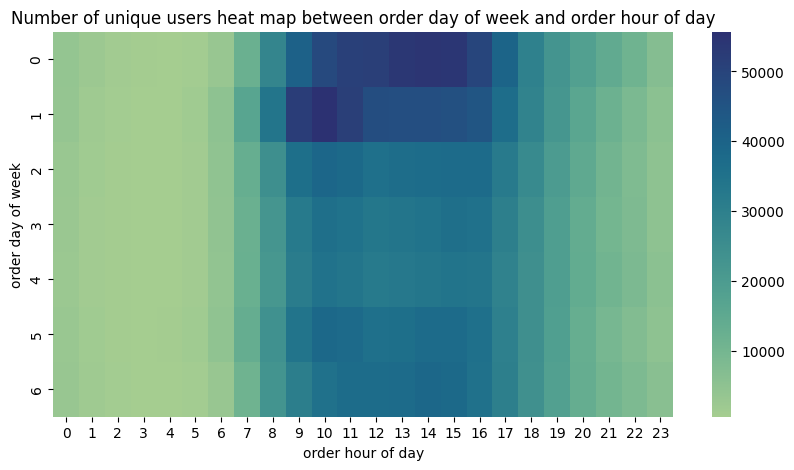

In [51]:
data = orders.groupby(["order_dow","order_hour_of_day"])["user_id"].agg("count").reset_index()
data = data.pivot(index = "order_dow",columns = "order_hour_of_day",values = "user_id")
fig = plt.figure(figsize=(10,5))
sns.heatmap(data = data,cmap = "crest")
plt.title("Number of unique users heat map between order day of week and order hour of day")
plt.xlabel("order hour of day")
plt.ylabel("order day of week")
plt.show()

### Reorder Frequency 🔄

In [52]:
# Reorder Frequency

#Filter for reordered products only
reordered_products = odpp[odpp['reordered'] == 1]

# Count the number of times each product was reordered
reordered_counts = reordered_products['product_id'].value_counts().head(10)

# Get product names by merging with the 'products' DataFrame
top_reordered_products = products[products['product_id'].isin(reordered_counts.index)]
top_reordered_products = top_reordered_products.merge(
    reordered_counts.rename('reorder_count'), 
    left_on='product_id', 
    right_index=True
)

# Sort the result by reorder_count
top_reordered_products = top_reordered_products.sort_values(by='reorder_count', ascending=False)
print(top_reordered_products[['product_id', 'product_name', 'reorder_count']])

       product_id            product_name  reorder_count
24851       24852                  Banana         252836
13175       13176  Bag of Organic Bananas         199910
21136       21137    Organic Strawberries         130345
21902       21903    Organic Baby Spinach         118108
47208       47209    Organic Hass Avocado         107444
47765       47766         Organic Avocado          84705
27844       27845      Organic Whole Milk          72791
47625       47626             Large Lemon          67331
27965       27966     Organic Raspberries          66390
16796       16797            Strawberries          62986


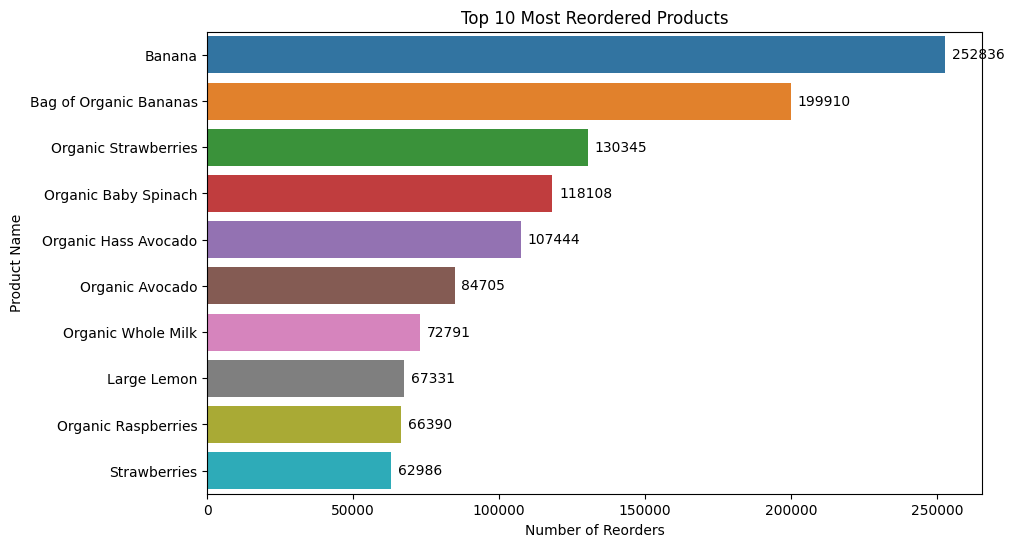

In [53]:
# Plot the most reordered products

# Create figure and axis
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='reorder_count', y='product_name', data=top_reordered_products)

# Labels and Title
plt.xlabel('Number of Reorders')
plt.ylabel('Product Name')
plt.title('Top 10 Most Reordered Products')

# Add text on bars (bar values)
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',  # Get bar width for horizontal bars
                (p.get_width(), p.get_y() + p.get_height() / 2),  # Position text at the end of the bar
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')

plt.show()

### Most Ordered Products 👌

In [54]:
# Most Ordered Products
top_product_id = order_detailes['product_id'].value_counts(ascending=False).head(10)
top_product_names = products[products['product_id'].isin(top_product_id.index)]
topic_product_final = top_product_names.merge(top_product_id, on='product_id', how='left')
topic_product_final = topic_product_final.sort_values('count', ascending=False)
print(topic_product_final)

   product_id            product_name  aisle_id  department_id   count
4       24852                  Banana        24              4  299866
0       13176  Bag of Organic Bananas        24              4  240070
2       21137    Organic Strawberries        24              4  167617
3       21903    Organic Baby Spinach       123              4  152749
7       47209    Organic Hass Avocado        24              4  135022
9       47766         Organic Avocado        24              4  111764
8       47626             Large Lemon        24              4   96565
1       16797            Strawberries        24              4   90223
5       26209                   Limes        24              4   89030
6       27845      Organic Whole Milk        84             16   87646


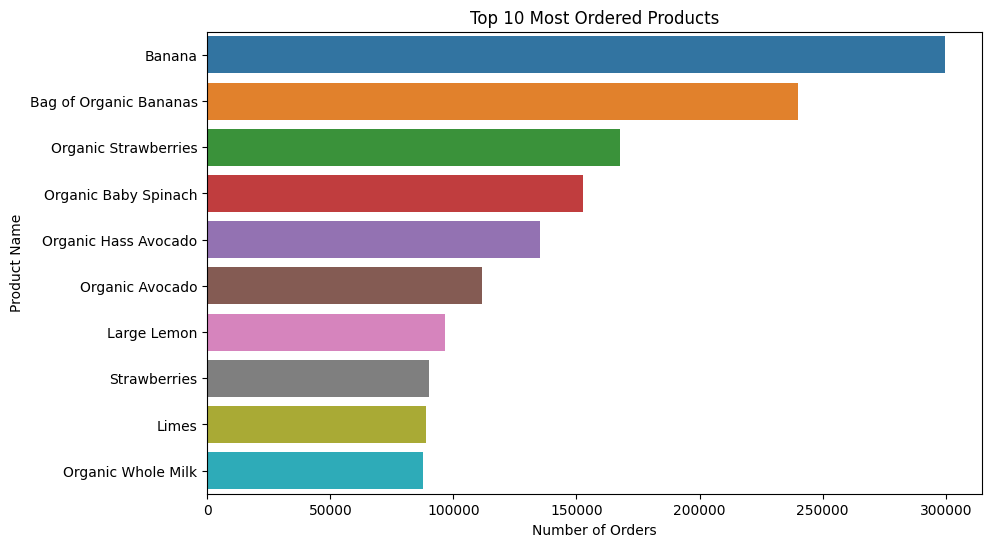

In [55]:
# Plot the most ordered products

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='count', y='product_name', data=topic_product_final)

# Labels and Title
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.title('Top 10 Most Ordered Products')

plt.show()

### Most Popular Aisles 🏪

In [56]:
# Most Popular Aisles
popular_aisle_counts = merge_orders_products['aisle_id'].value_counts().head(20)
popular_aisles = aisles[aisles['aisle_id'].isin(popular_aisle_counts.index)]
popular_aisles = popular_aisles.merge(popular_aisle_counts.rename('count'), on='aisle_id', how='left')
popular_aisles = popular_aisles.sort_values(by='count', ascending=False)
print(popular_aisles)

    aisle_id                          aisle    count
2         24                   fresh fruits  2305892
7         83               fresh vegetables  2161455
19       123     packaged vegetables fruits  1116489
17       120                         yogurt   918997
1         21                packaged cheese   619974
8         84                           milk   564516
15       115  water seltzer sparkling water   533002
13       107                 chips pretzels   457470
10        91                soy lactosefree   403880
14       112                          bread   370647
3         31                   refrigerated   363855
16       116                 frozen produce   331173
4         37                  ice cream ice   314955
6         78                       crackers   290356
0          3            energy granola bars   289400
9         86                           eggs   286478
12        96                     lunch meat   250187
5         38                   frozen meals   

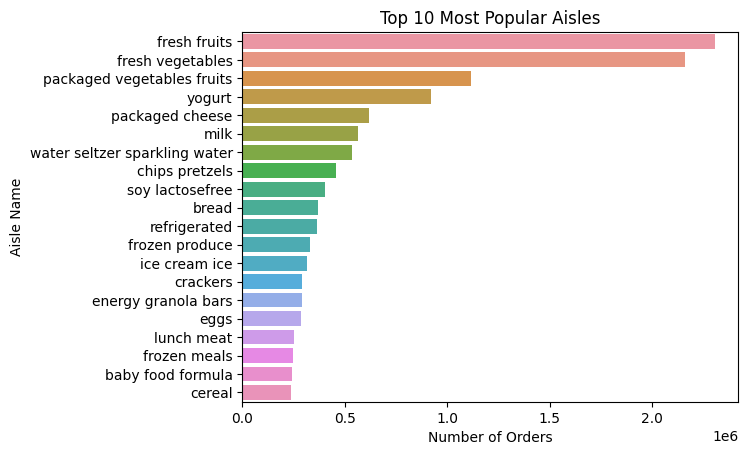

In [57]:
# Plot the most popular aisles
sns.barplot(x='count', y='aisle', data=popular_aisles)
plt.xlabel('Number of Orders')
plt.ylabel('Aisle Name')
plt.title('Top 10 Most Popular Aisles')
plt.show()


### Most Popular Department 🏬

In [58]:
# Most Popular Departments
popular_department_counts = merge_orders_products['department_id'].value_counts().head(10)
popular_departments = departments[departments['department_id'].isin(popular_department_counts.index)]
popular_departments = popular_departments.merge(popular_department_counts.rename('count'), on='department_id', how='left')
popular_departments = popular_departments.sort_values(by='count', ascending=False)
print(popular_departments)

   department_id       department    count
2              4          produce  5997132
7             16       dairy eggs  3427581
8             19           snacks  1828344
3              7        beverages  1702734
0              1           frozen  1414599
5             13           pantry  1186030
1              3           bakery   745154
6             15     canned goods   675542
9             20             deli   665601
4              9  dry goods pasta   548063


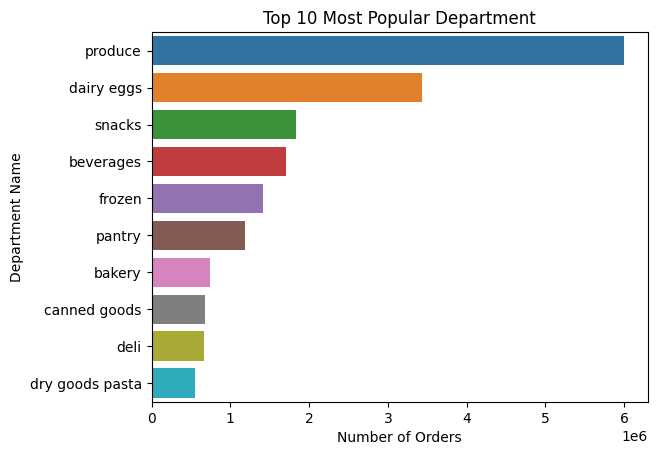

In [59]:
# Plot the most popular department
sns.barplot(x='count', y='department', data=popular_departments)
plt.xlabel('Number of Orders')
plt.ylabel('Department Name')
plt.title('Top 10 Most Popular Department')
plt.show()


### Total Products in Aisle

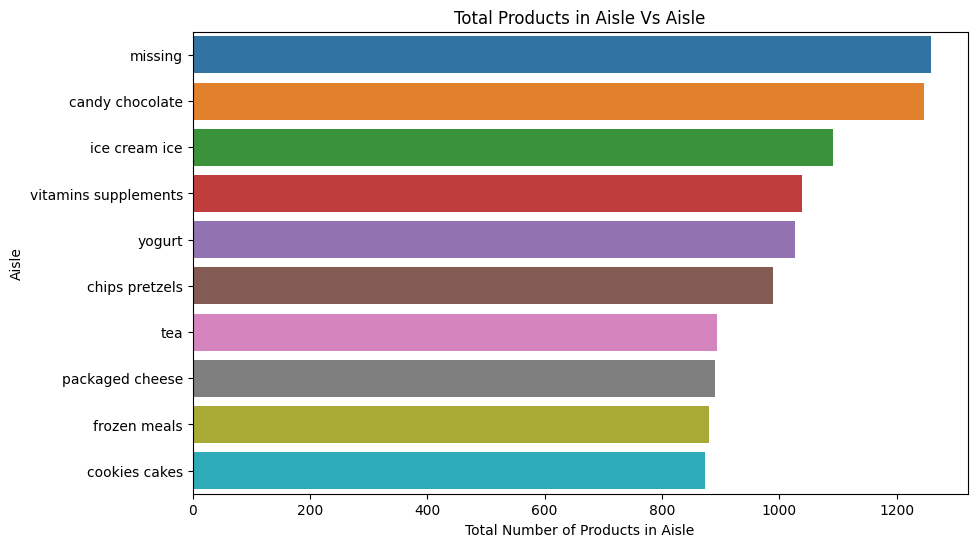

In [60]:
# Total Products in Aisle

# Get total unique products per aisle, sorted in descending order
tot_prd_aisle = product_details.groupby("aisle")["product_id"].nunique().sort_values(ascending=False)

# Create figure and axis
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=tot_prd_aisle.values[:10], y=tot_prd_aisle.index[:10])

# Labels and Title
plt.xlabel("Total Number of Products in Aisle")
plt.ylabel("Aisle")
plt.title("Total Products in Aisle Vs Aisle")


plt.show()

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* Missing aisle, candy chocolate aisle and ice creams ice aisle are having more unique variety of products in them.
* Bulk dried fruits vegetables, bulk grains rice dried goods, packaged produce are have less unique variety of products in them

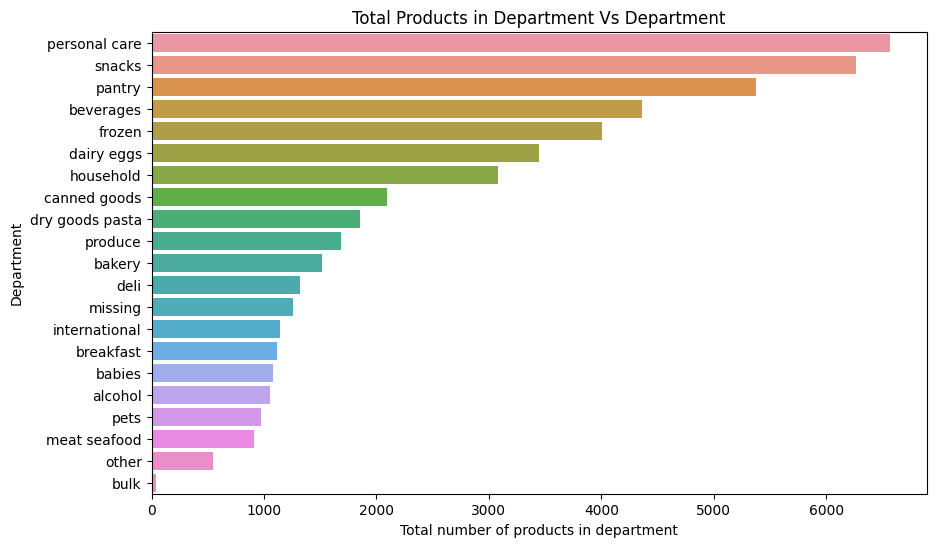

In [61]:
# Total Products in Department
tot_prd_department = product_details.groupby("department")["product_id"].nunique().sort_values(ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=tot_prd_department.values, y=tot_prd_department.index)

plt.ylabel("Department")
plt.xlabel("Total number of products in department")
plt.title("Total Products in Department Vs Department")

plt.show()

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* With respect to number of unique products, bulk department has less number of products. Personal care has more number of products

### Total Aisles in Department

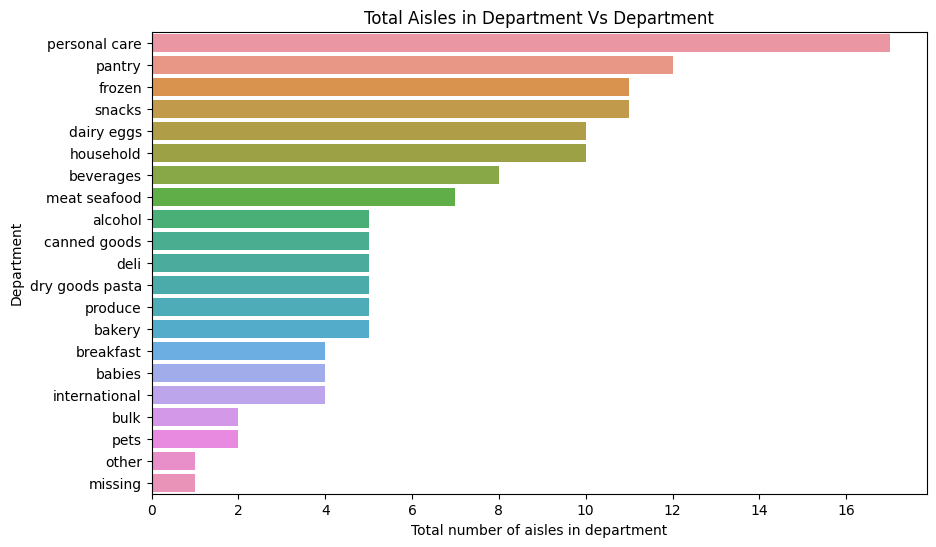

In [62]:
# Total Aisles in Department
tot_aisle_department = product_details.groupby("department")["aisle"].nunique().sort_values(ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=tot_aisle_department.values, y=tot_aisle_department.index)

plt.ylabel("Department")
plt.xlabel("Total number of aisles in department")
plt.title("Total Aisles in Department Vs Department")

plt.show()

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    

* personal care department has more number of aisles
* missing department has less number of aisles

### Product Reorder Percentage With Respect To Total Product Purchases

In [63]:
order_number_max = orders.groupby("user_id")["order_number"].max()
order_number_max_count = order_number_max.value_counts()
order_number_max

user_id
1         11
2         15
3         13
4          6
5          5
          ..
206205     4
206206    68
206207    17
206208    50
206209    14
Name: order_number, Length: 206209, dtype: int64

In [64]:
tot_reod_pur = order_detailes.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
tot_reod_pur = tot_reod_pur.sort_values('total', ascending=False).reset_index()
tot_reod_pur["product_reorder_percentage"] = tot_reod_pur["reorders"]*100/tot_reod_pur["total"]
tot_reod_pur

,product_name,total,reorders,product_reorder_percentage
0,Banana,299866,252836.0,84.316328
1,Bag of Organic Bananas,240070,199910.0,83.271546
2,Organic Strawberries,167617,130345.0,77.763592
3,Organic Baby Spinach,152749,118108.0,77.321619
4,Organic Hass Avocado,135022,107444.0,79.575180
...,...,...,...,...
49527,Wild Oregano Oil,1,0.0,0.000000
49528,Blue 13 gallon Recycling Bags,1,0.0,0.000000
49529,Face & Body Charcoal Soap Bar,1,0.0,0.000000
49530,Renewal Smoothing Eye Cream,1,0.0,0.000000


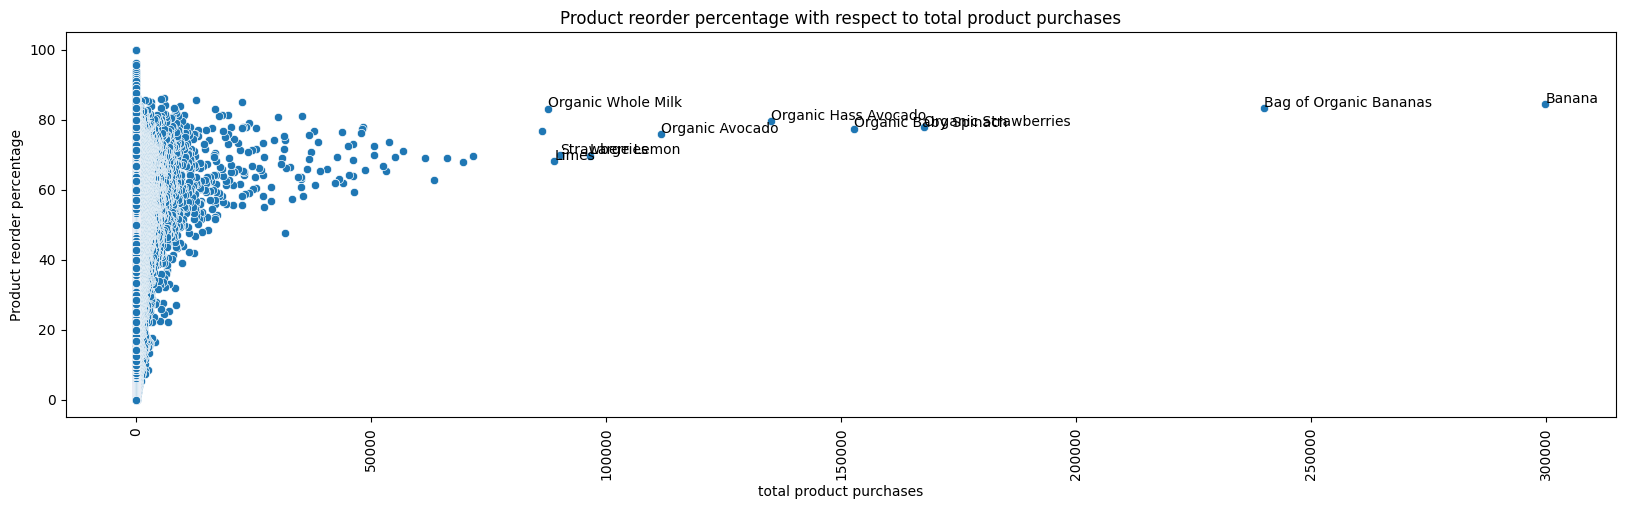

In [65]:
fig = plt.figure(figsize=(20,5))
sns.scatterplot(x = 'total',y = 'product_reorder_percentage',data = tot_reod_pur)
plt.xlabel("total product purchases")
plt.ylabel("Product reorder percentage")
plt.title("Product reorder percentage with respect to total product purchases")
plt.xticks(rotation = 90)
for i in range(10):
    plt.annotate(tot_reod_pur["product_name"][i],(tot_reod_pur["total"][i],tot_reod_pur["product_reorder_percentage"][i]+0.5),size = 10)
plt.show()

## 5. 🔍 Market Basket Analysis & Association Rules

In this section, we will perform market basket analysis to identify frequent item combinations and generate association rules.

### Frequent Item Combinations 🛍️

We will use the Apriori algorithm to find frequent item sets.

In [76]:
import pandas as pd
import numpy as np
import sys
from itertools import combinations, groupby
from collections import Counter
from IPython.display import display

In [77]:
# Convert from DataFrame to a Series, with order_id as index and item_id as value
odpp = odpp.set_index('order_id')['product_id'].rename('item_id')
display(odpp.head(10))
type(odpp)

order_id
2    33120
2    28985
2     9327
2    45918
2    30035
2    17794
2    40141
2     1819
2    43668
3    33754
Name: item_id, dtype: int64

pandas.core.series.Series

In [82]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    # Convert DataFrame to NumPy array (fixed)
    order_item = order_item.reset_index().values  
    
    # Group by order_id (first column)
    for order_id, order_object in groupby(order_item, key=lambda x: x[0]):
        item_list = [item[1] for item in order_object]  # Extract items
        
        # Generate all possible item pairs
        for item_pair in combinations(item_list, 2):
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]               

In [83]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [85]:
%%time
rules = association_rules(odpp, 0.01)  

Starting order_item:               20526345
Items with support >= 0.01:           10935
Remaining order_item:              18894287
Remaining orders with 2+ items:     1906704
Remaining order_item:              18779691
Item pairs:                        24831740
Item pairs with support >= 0.01:      48910

CPU times: user 4min 57s, sys: 10.2 s, total: 5min 7s
Wall time: 5min 6s


In [86]:
# Replace item ID with item name and display association rules
item_name   = pd.read_csv('/kaggle/input/instacart-market-basket-analysis-nonzip-dataset/products.csv')
item_name   = item_name.rename(columns={'product_id':'item_id', 'product_name':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
display(rules_final)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Organic Strawberry Chia Lowfat 2% Cottage Cheese,Organic Cottage Cheese Blueberry Acai Chia,205,0.010752,730,0.038286,545,0.028583,0.280822,0.376147,9.824666
1,Grain Free Chicken Formula Cat Food,Grain Free Turkey Formula Cat Food,194,0.010175,1183,0.062044,546,0.028636,0.163990,0.355311,5.726742
2,Organic Grapefruit Ginger Sparkling Yerba Mate,Cranberry Pomegranate Sparkling Yerba Mate,223,0.011696,1077,0.056485,712,0.037342,0.207057,0.313202,5.544884
3,Organic Fruit Yogurt Smoothie Mixed Berry,Apple Blueberry Fruit Yogurt Smoothie,227,0.011905,963,0.050506,836,0.043845,0.235722,0.271531,5.376214
4,Nonfat Strawberry With Fruit On The Bottom Gre...,"0% Greek, Blueberry on the Bottom Yogurt",246,0.012902,1032,0.054125,865,0.045366,0.238372,0.284393,5.254393
...,...,...,...,...,...,...,...,...,...,...,...
48905,Organic Strawberries,Strawberries,402,0.021084,166809,8.748552,89473,4.692548,0.002410,0.004493,0.000514
48906,Organic Hass Avocado,Organic Avocado,294,0.015419,134493,7.053691,111394,5.842228,0.002186,0.002639,0.000374
48907,Organic Avocado,Organic Hass Avocado,282,0.014790,111394,5.842228,134493,7.053691,0.002532,0.002097,0.000359
48908,Banana,Bag of Organic Bananas,411,0.021556,298330,15.646372,238107,12.487885,0.001378,0.001726,0.000110


## 6. ✅ Conclusion & Key Findings

In this section, we will summarize the key findings from our analysis and provide recommendations.

Key Findings 🔑

    Customer Rush Hours: Most orders are placed between 10 AM and 4 PM.

    Top Products: The most popular products include fresh fruits and vegetables.

    Reorder Patterns: A significant percentage of products are reordered, indicating customer loyalty.

    Frequent Item Combinations: We identified several strong associations between products, such as bananas and strawberries.

### Recommendations 💡

    Optimize Inventory: Stock up on popular items during peak hours to meet customer demand.

    Personalized Recommendations: Use association rules to provide personalized product recommendations.

    Loyalty Programs: Implement loyalty programs to encourage repeat purchases.

## 🎉 Thank You!

### Thank you for exploring the Instacart Market Basket Analysis with us. We hope you found the insights valuable and the visualizations engaging. Happy analyzing! 🚀